## Analyzing Netflix Movie Durations

### Introduction

Netflix, founded in 1997 as a DVD rental service, has evolved into the largest entertainment and media company by market capitalization, boasting over 200 million subscribers as of January 2021. With a vast library of movies and TV series, we have an opportunity to explore trends in movie durations over the years. Are movies getting shorter? Let's find out!

Our goal is to investigate whether there is evidence to support the claim that the average duration of movies on Netflix has been declining. To do this, we will need to:

1. Create a DataFrame from provided data.
2. Visualize the data.
3. Explore the impact of the non-feature film genre on movie duration.

#### Step 1: Import the necessary libraries


In [1]:
# Import pandas under the alias pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Data Preparation   

To begin, we'll create a Python DataFrame from the provided data.

In [2]:
# Data Preparation
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a DataFrame
movie_dict = {
    "years": years,
    "durations": durations
}

# Print the DataFrame/dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


#### Step 3: Visualizing Movie Duration

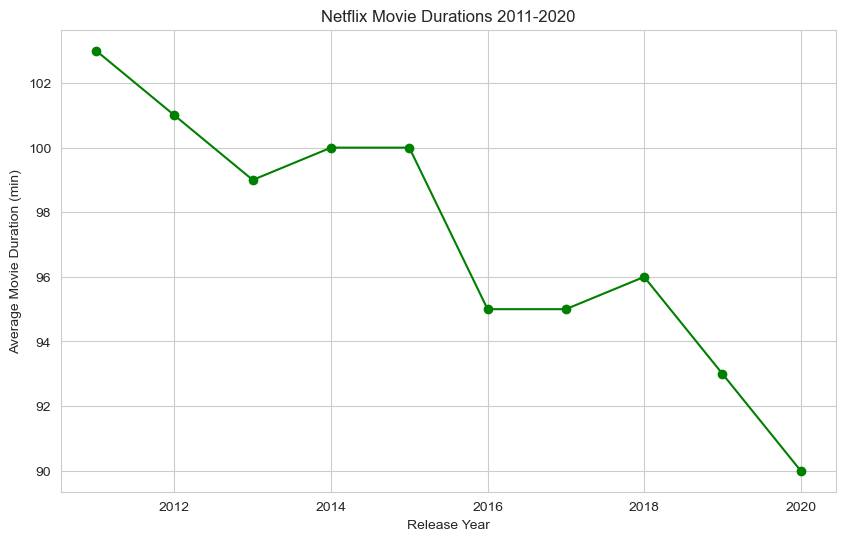

In [3]:
# Crete a line 
plt.figure(figsize=(10, 6))
plt.plot(years, durations, color='green', marker='o', linestyle='solid')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Movie Duration (min)')
plt.title('Netflix Movie Durations 2011-2020')

# Display the plot
plt.grid(True)
plt.show()

#### Step 4: Impact of Non-Feature Films

To understand if non-feature film genres are affecting the decline in movie durations, we'll filter the data and visualize it with distinct colors.

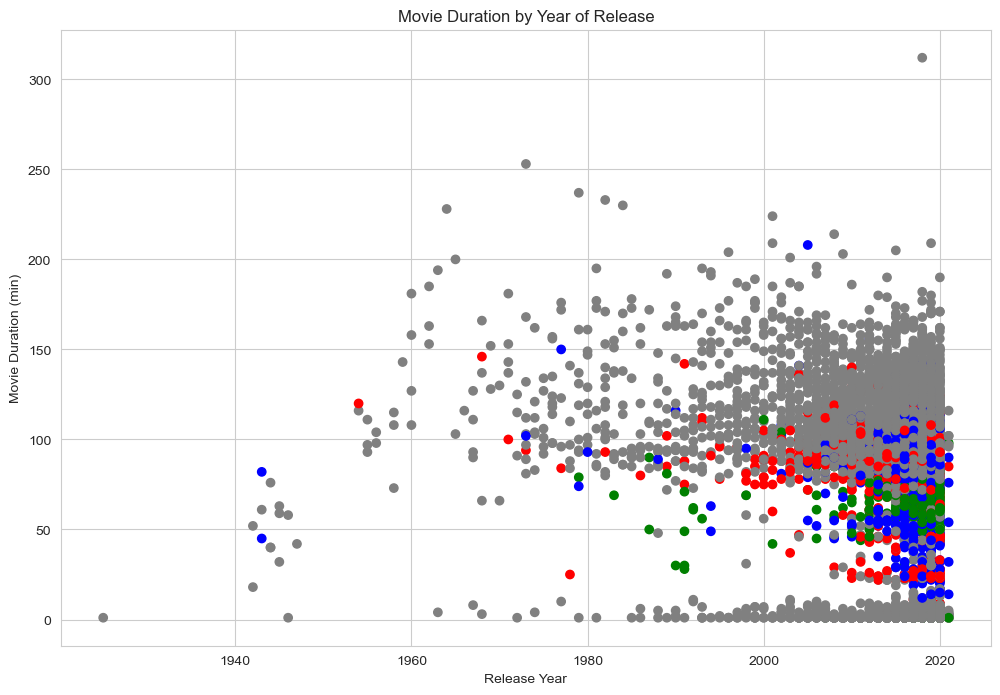

In [4]:
# Filter for movie type
netflix_df = pd.read_csv('assets/data/netflix_data.csv')
netflix_df_movies_only = netflix_df[netflix_df['type'] == "Movie"]

# Select relevant columns
column_of_interest = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies_subset = netflix_df[column_of_interest]

# Create a list of colors based on genre
colors = []
for index, row in netflix_movies_subset.iterrows():
    genre = row['genre']
    if genre == "Children":
        colors.append("red")
    elif genre == "Documentaries":
        colors.append("blue")
    elif genre == "Stand-Up":
        colors.append("green")
    else:
        colors.append("grey")
        
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt. scatter(netflix_movies_subset['release_year'], netflix_movies_subset['duration'], c=colors)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Movie Duration (min)')
plt.title('Movie Duration by Year of Release')

# Display the plot
plt.grid(True)
plt.show()

### Here are some additional aspects of the data that we could explore:

#### 1. Genre Distribution

Visualize the distribution of movie genres on Netflix. This will help you understand which genres are most prevalent.

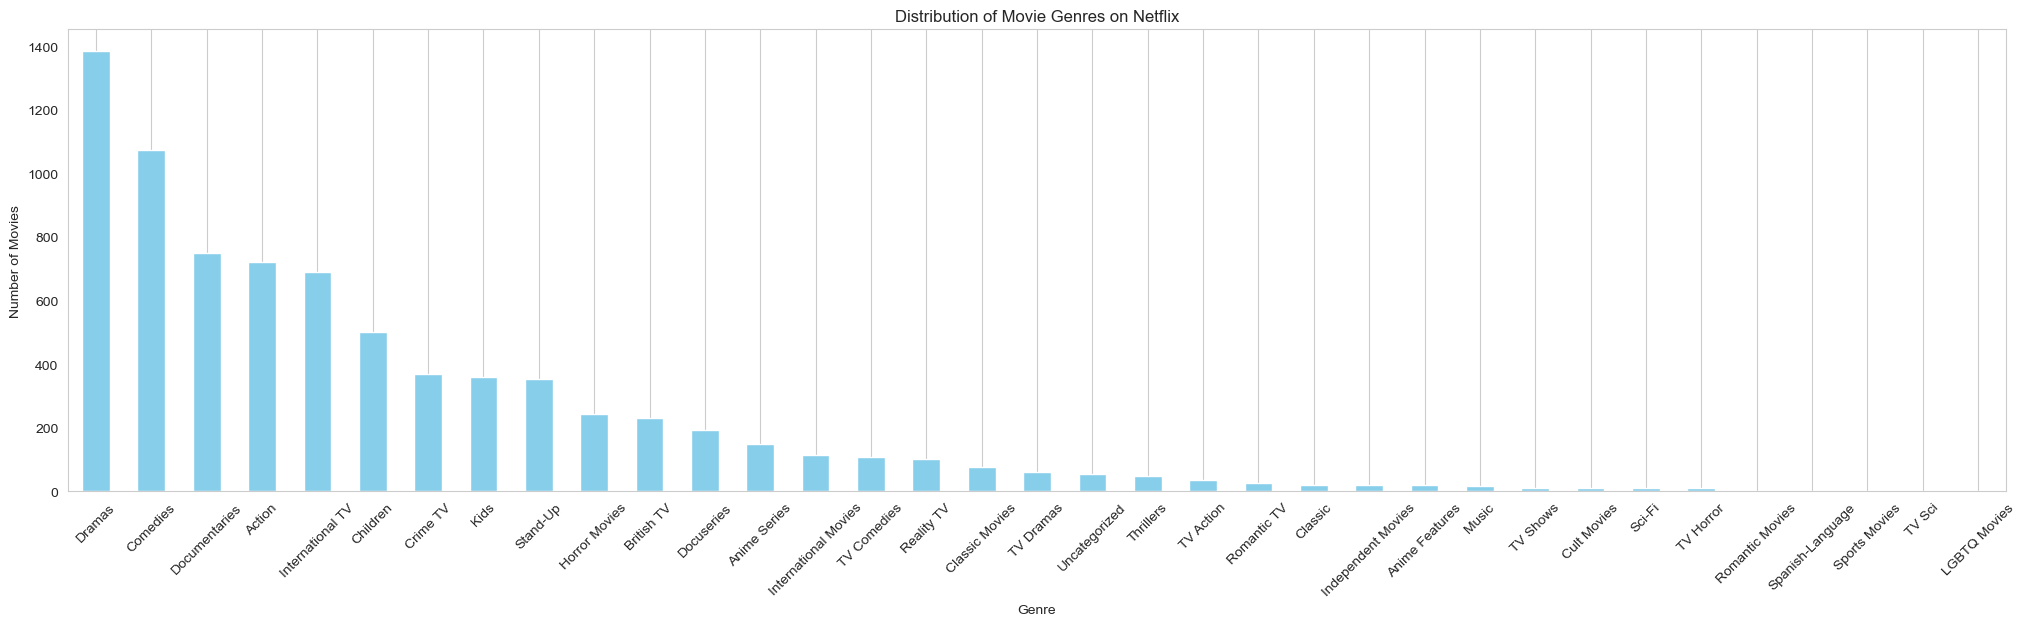

In [5]:
# Count the number of movies in each genre
genre_counts = netflix_movies_subset['genre'].value_counts()

# Create a bar chart
plt.figure(figsize=(25, 6))
genre_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres on Netflix')
plt.xticks(rotation=45)
           
# Display the plot
plt.grid(axis='y')
plt.show()

#### 2. County of Origin

Visualize the distribution of movies based on their country of origin. This can provide insights into which countries produce the most content on Netflix.

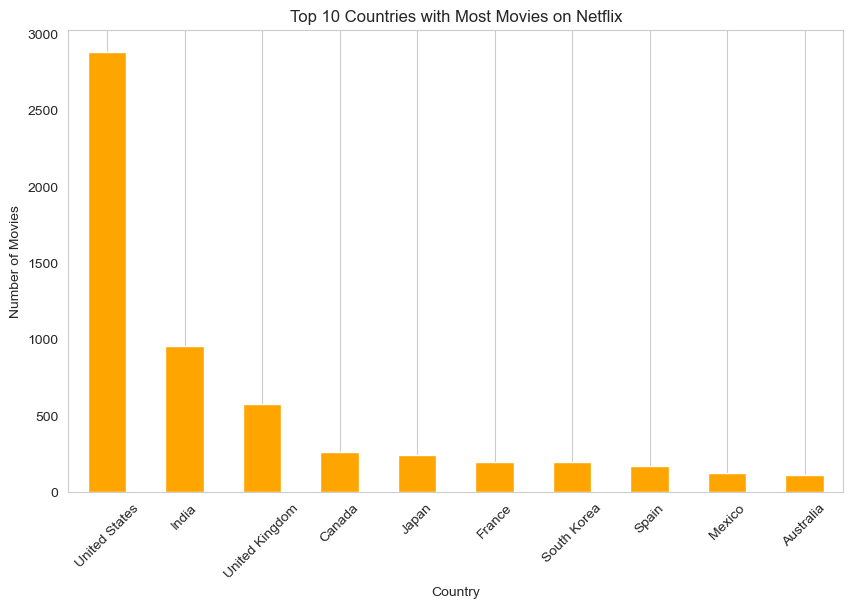

In [6]:
# Count the number of movies from each country
country_counts = netflix_movies_subset['country'].value_counts().head(10)  # Display the top 10 countries

# Create a bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='orange')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Top 10 Countries with Most Movies on Netflix')
plt.xticks(rotation=45)

# Display the plot
plt.grid(axis='y')
plt.show()

#### 3. Movie Duration Distribution

Visualize the distribution of movie durations as a histogram to see how durations are spread across the dataset.

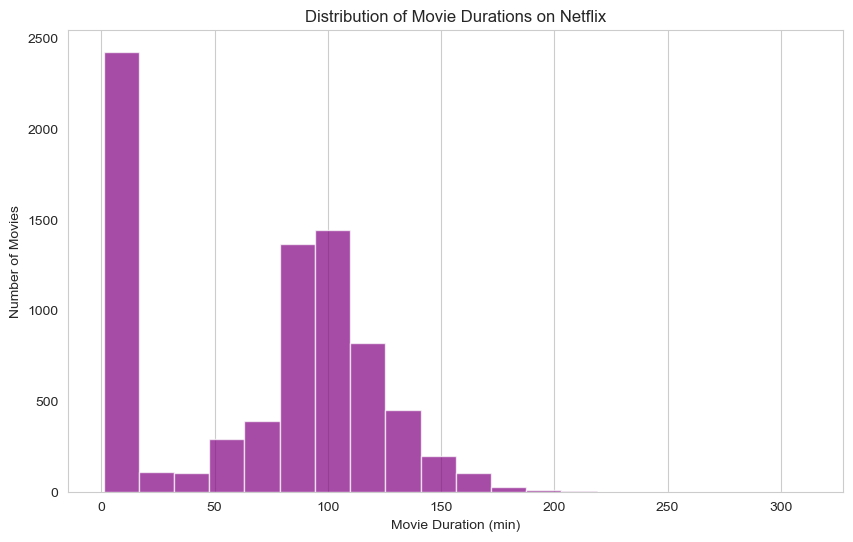

In [7]:
# Create a histogram of movie durations
plt.figure(figsize=(10, 6))
plt.hist(netflix_movies_subset['duration'], bins=20, color='purple', alpha=0.7)

# Add labels and title
plt.xlabel('Movie Duration (min)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations on Netflix')

# Display the plot
plt.grid(axis='y')
plt.show()

#### 4. Release Year Trends by Genre

Explore how the number of movies released each year varies for different genres. This can help you identify trends in genre popularity over time.

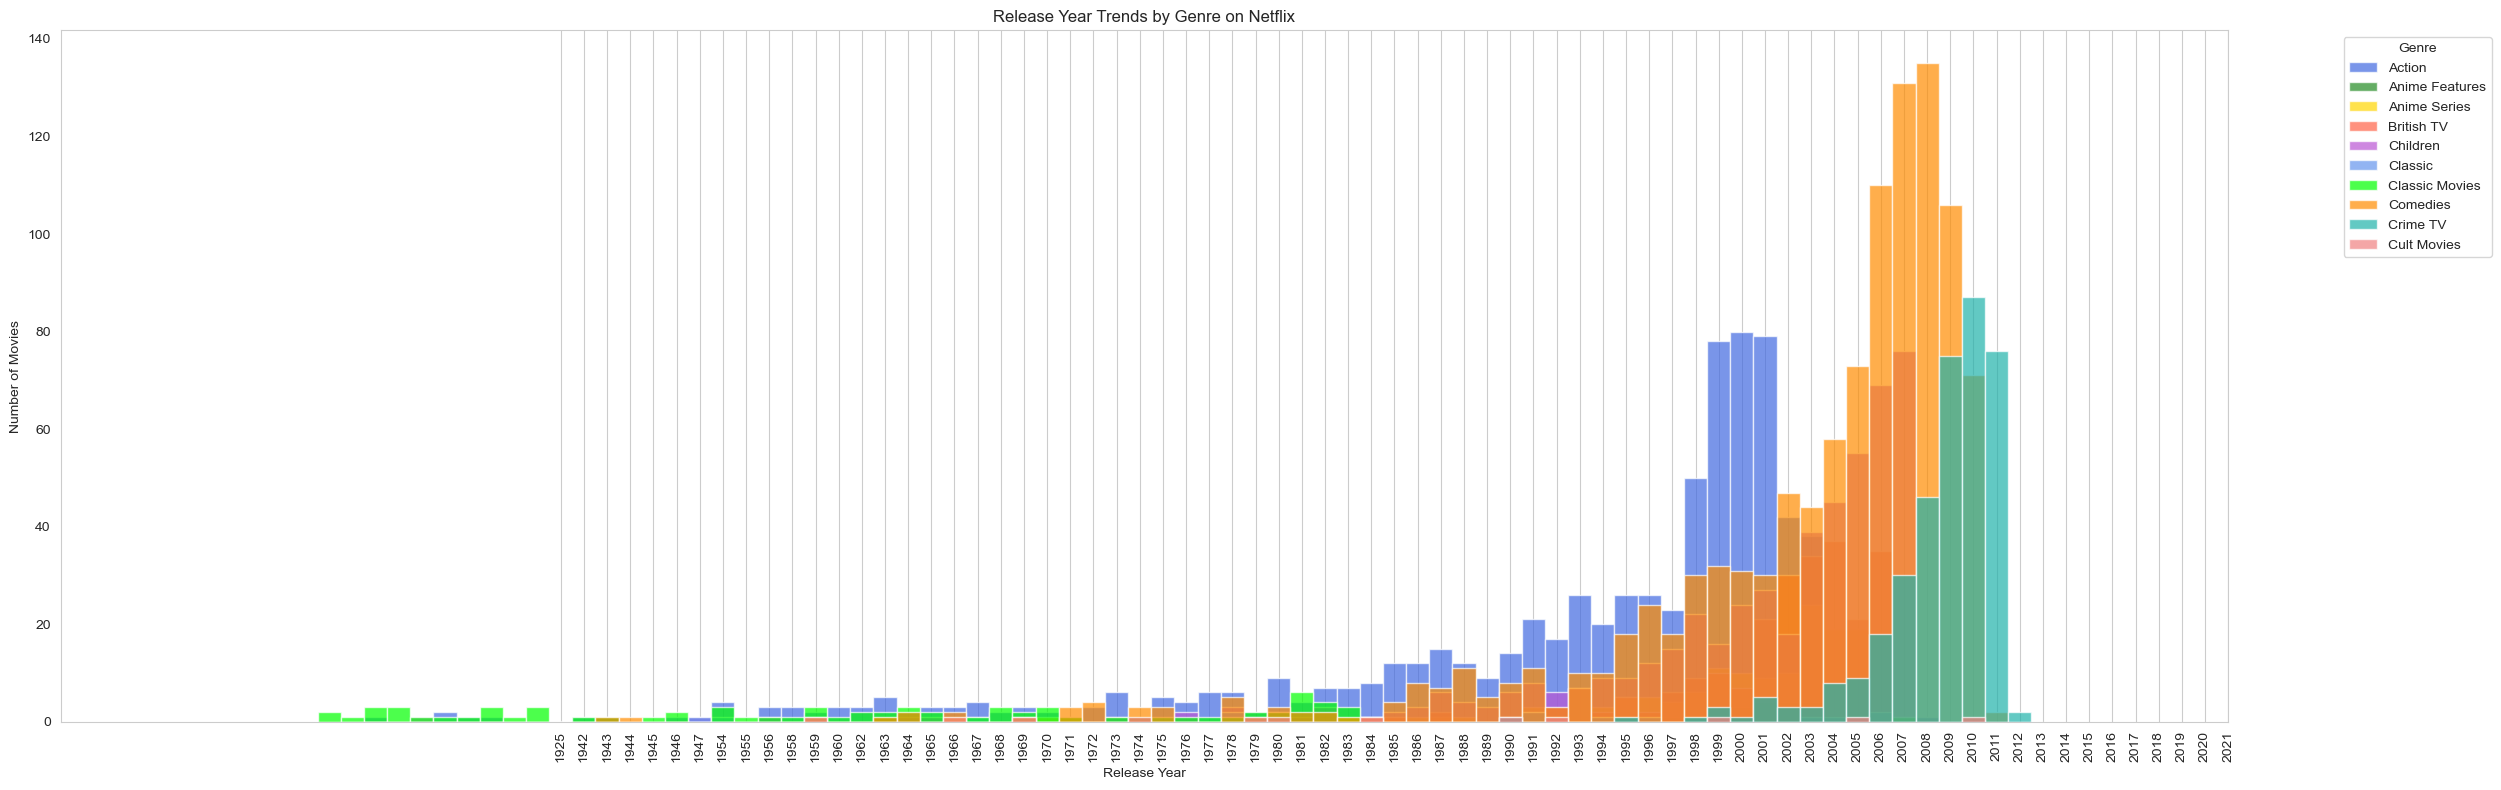

In [8]:
# Group the data by release year and genre
genre_year_counts = netflix_movies_subset.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Create a grouped bar chart
plt.figure(figsize=(25, 8))

# Define colors for each genre
colors = ['royalblue', 'forestgreen', 'gold', 'tomato', 'mediumorchid', 'cornflowerblue', 'lime', 'darkorange', 'lightseagreen', 'lightcoral']

# Calculate the width of each bar group
bar_width = 1

# Calculate the positions for bars within each group
position = range(len(genre_year_counts))

# Create a bar for each genre within each year
for i, (genre, color) in enumerate(zip(genre_year_counts.columns, colors)):
    plt.bar(
        [pos + i * bar_width for pos in position],
        genre_year_counts[genre],
        width=bar_width,
        label=genre,
        color=color,
        alpha=0.7,
    )

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Release Year Trends by Genre on Netflix')
plt.grid(axis='y')

# Adjust x-axis labels
plt.xticks([pos + (len(genre_year_counts.columns) / 2 - 0.5) * bar_width for pos in position], genre_year_counts.index, rotation=90)

# Improve legend placement
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 5. Seasonal Trends in Movie Releases

Explore whether there are seasonal trends in movie releases. Group movies by month and visualize the number of releases each month.

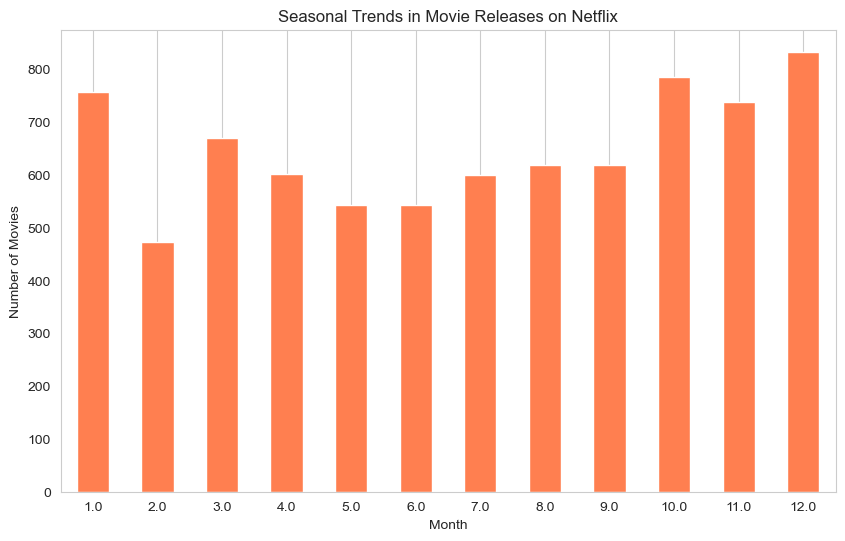

In [9]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
netflix_movies_subset = netflix_df[column_of_interest].copy()

# Extract month from the date_added column using .loc
netflix_movies_subset['month_added'] = pd.to_datetime(netflix_df['date_added']).dt.month

# Group by month and count movies
monthly_movie_counts = netflix_movies_subset.groupby('month_added').size()

# Create a bar chart to visualize seasonal trends
plt.figure(figsize=(10, 6))
monthly_movie_counts.plot(kind='bar', color='coral')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title('Seasonal Trends in Movie Releases on Netflix')
plt.xticks(rotation=0)

# Display the plot
plt.grid(axis='y')
plt.show()

#### 6. Movie Duration by Genre

Visualize the distribution of movie durations for different genres. This can help you identify which genres tend to have longer or shorter movies.

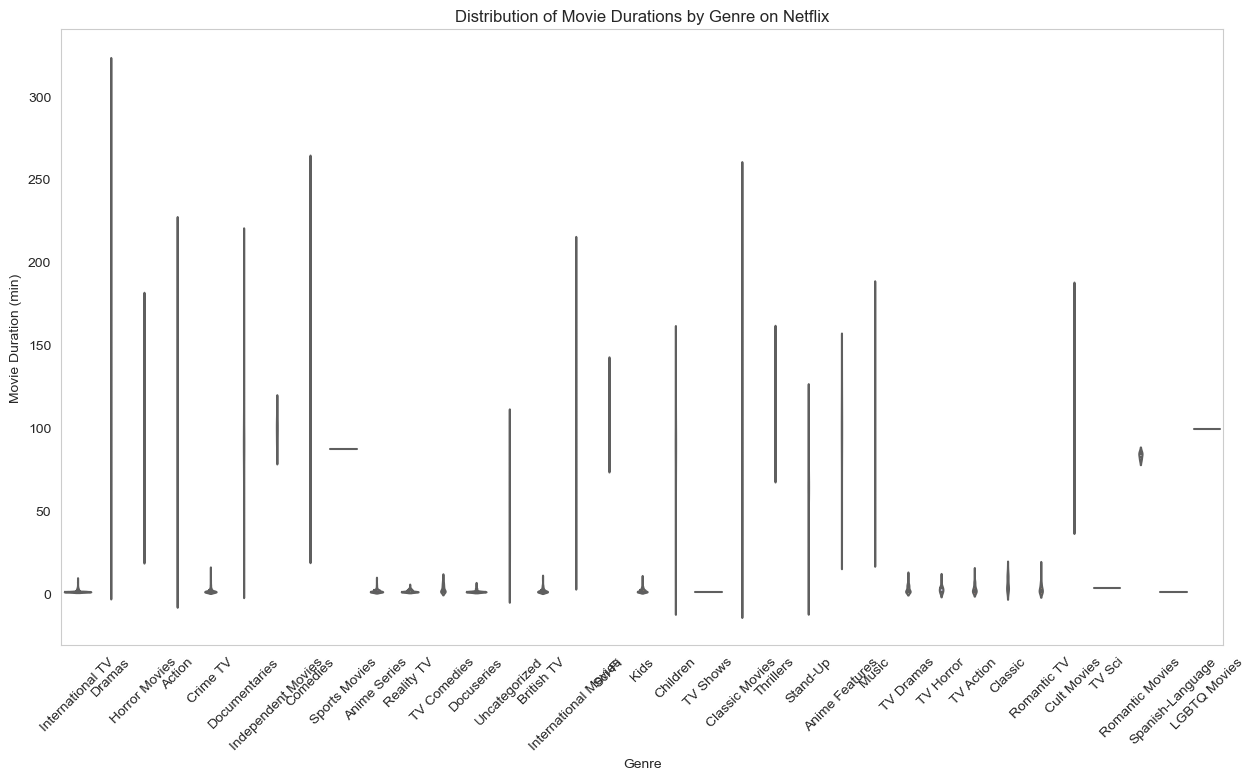

In [10]:
# Create a violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(x='genre', y='duration', data=netflix_movies_subset, palette='Set3', inner='quart')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Movie Duration (min)')
plt.title('Distribution of Movie Durations by Genre on Netflix')
plt.xticks(rotation=45)

# Display the plot
plt.grid(axis='y')
plt.show()

#### 7. Top Directors with the Most Movies

Identify the directors with the most movies on Netflix and create a bar chart to visualize their contributions.

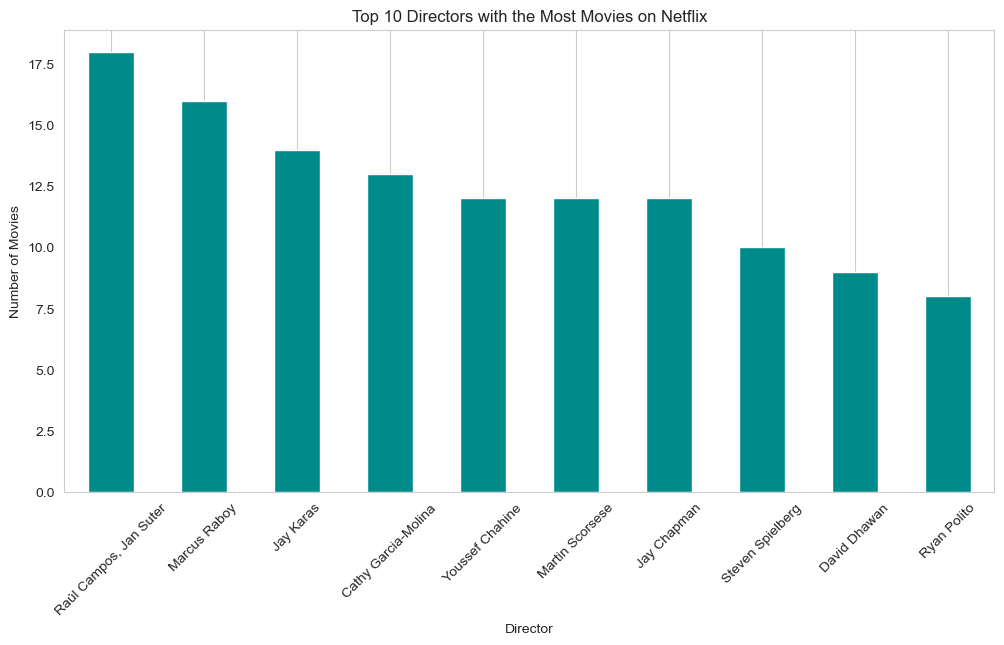

In [11]:
# Count the number of movies by director
director_counts = netflix_df['director'].value_counts().head(10)

# Create a bar chart for the top directors
plt.figure(figsize=(12, 6))
director_counts.plot(kind='bar', color='darkcyan')

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with the Most Movies on Netflix')
plt.xticks(rotation=45)

## Display the plot
plt.grid(axis='y')
plt.show()

#### 8. Movie Duration Over the Years (Average)

Calculate and visualize the average movie duration over the years to see if there is a noticeable trend.

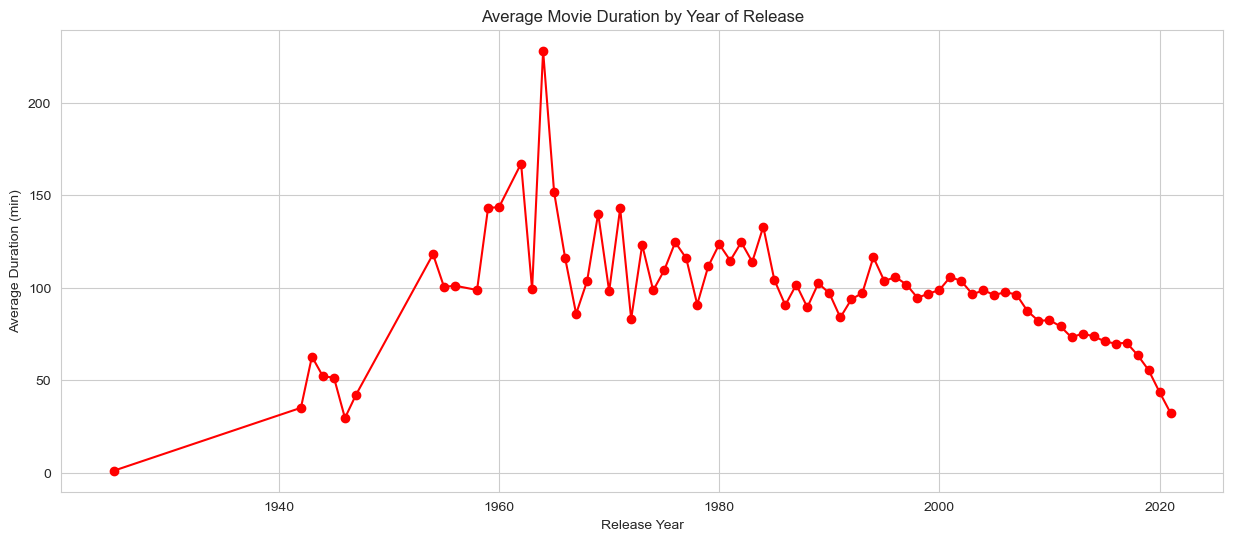

In [12]:
# Calculate the average movie duration for each year
average_duration_by_year = netflix_movies_subset.groupby('release_year')['duration'].mean()

# Create a line pot to visualize the average movie duration by year
plt.figure(figsize=(15, 6))
plt.plot(average_duration_by_year.index, average_duration_by_year, color='red', marker='o', linestyle='solid')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Duration (min)')
plt.title('Average Movie Duration by Year of Release')

# Display the plot
plt.grid(True)
plt.show()